In [1]:
# use make_moons to generate data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

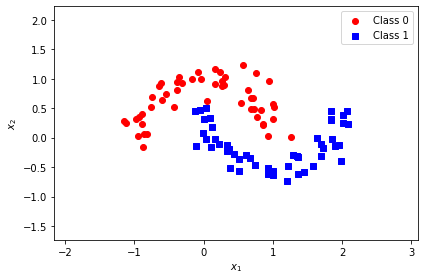

In [2]:
# generate raw data
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
# generate training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [5]:
#  Standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    to_be_pre = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(to_be_pre)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

[KNN]
Misclassified samples: 1
Accuracy: 0.95


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


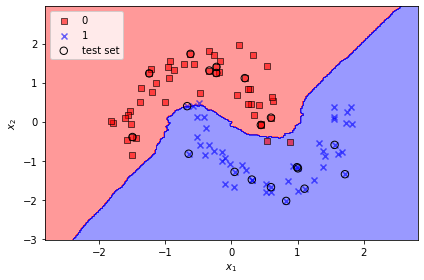

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[SVM]
Misclassified samples: 1
Accuracy: 0.95


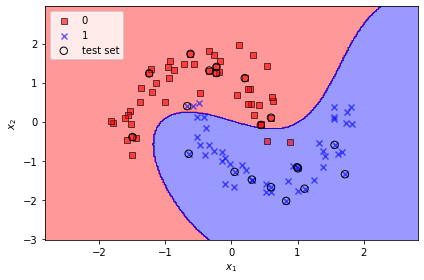

In [9]:
svm = SVC(gamma = 0.2, C = 10.0, random_state = 0, kernel = "rbf")
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[SVM]
Misclassified samples: 3
Accuracy: 0.85


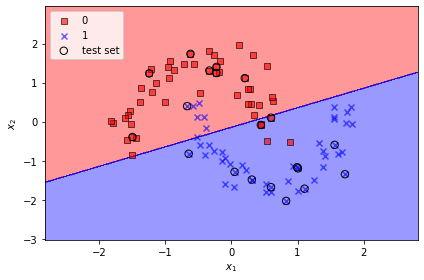

In [10]:
svm = SVC(C = 1000.0, random_state = 0, kernel = "linear")
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[SVM]
Misclassified samples: 4
Accuracy: 0.80


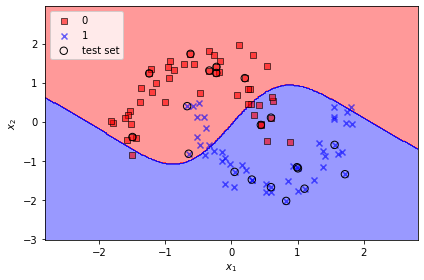

In [11]:
svm = SVC(kernel = "sigmoid")
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print('[SVM]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[SVM]
c = 1000.0, gamma = 0.1
Misclassified samples: 0
Accuracy: 1.00


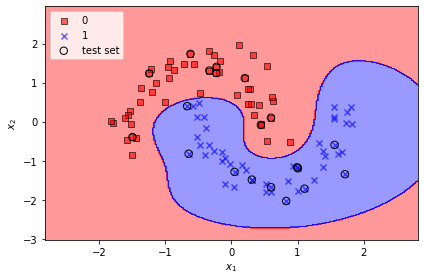

In [12]:
c = [0.1,1.0,10.0,100.0,1000.0,10000.0]
g = [0.00001,0.0001,0.001,0.01,0.1,1.0]
best_accuracy = 0
best = 0
mis = 0

for i in range(len(c)):
    
    svm = SVC(random_state = 0, C = c[i], gamma = g[i])
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    mis = (y_test != y_pred).sum()
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy > best_accuracy):
        best_accuracy = accuracy
        best = i

    
print('[SVM]')
print("c = {0}, gamma = {1}".format(c[best],g[best]))
print('Misclassified samples: %d' % mis)
print('Accuracy: %.2f' %best_accuracy)

    
# plot decision regions for svm classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Logistic Regression]
Misclassified samples: 3
Accuracy: 0.85


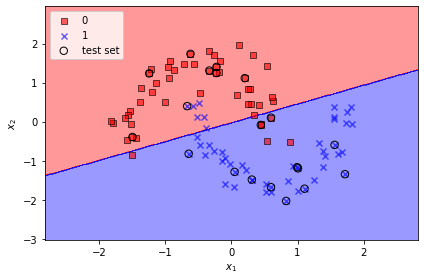

In [13]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression(C = 1000.0, random_state = 0, solver = "liblinear")
log_re.fit(X_train_std, y_train)
y_pred = log_re.predict(X_test_std)

print('[Logistic Regression]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=log_re, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()